In [1]:
import numpy as np
import ipywidgets as widgets
from skimage.io import imread
import matplotlib.pyplot as plt

In [2]:
# stack = imread(r"Z:\Shared363\Shared\Microscopes\high-throughput-openframe\test\6um_200nm_steps_1\6um_200nm_steps_1_MMStack_Default_ROTATED.ome.tif")

stack = imread(r"Z:\Shared363\Shared\Microscopes\high-throughput-openframe\240815 test\6um_200nm_steps_1\6um_200nm_steps_1_MMStack_Default.ome.tif")


In [3]:
# get the projection of the 0th axis for all frames
proj_0 = []
proj_1 = []

for frame in stack:
    proj_0.append(np.sum(frame, axis=0))
    proj_1.append(np.sum(frame, axis=1))

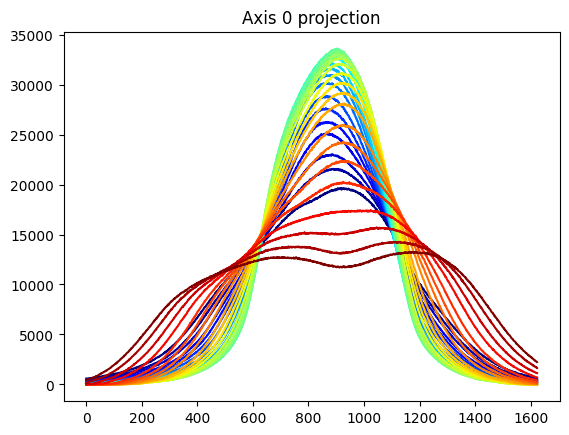

In [4]:
# select a progressive colormap
plt.figure()
cmap = plt.get_cmap('jet', len(proj_0))
# make sure colormap has 31 colors only
plt.title("Axis 0 projection")
# make figure follow colormap
for i, proj in enumerate(proj_0):
    plt.plot(proj, color=cmap(i))

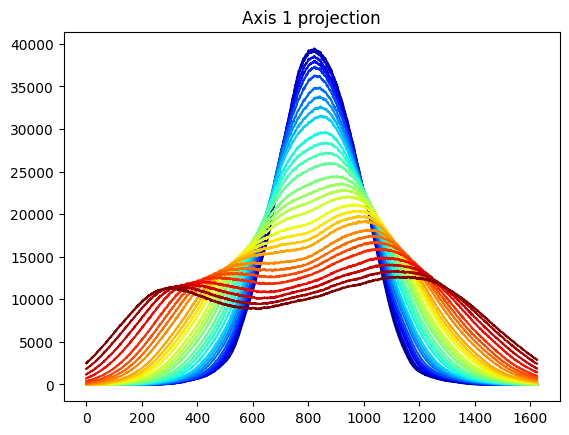

In [5]:
# select a progressive colormap
plt.figure()
cmap = plt.get_cmap('jet', len(proj_0))
# make sure colormap has 31 colors only
plt.title("Axis 1 projection")
# make figure follow colormap
for i, proj in enumerate(proj_1):
    plt.plot(proj, color=cmap(i))

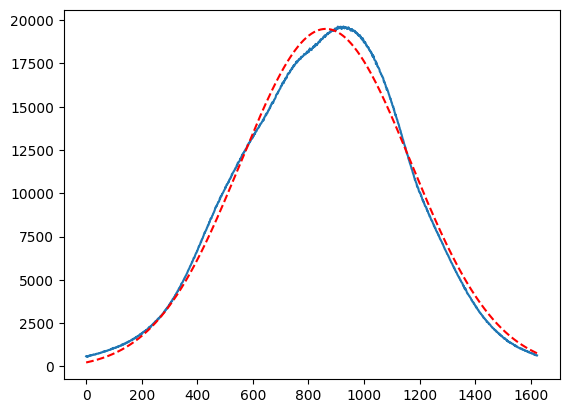

In [8]:
# fit a gaussian to the projections
from fit_testing import fit_gaussian, Gaussian1D
x_projection = proj_0[0]
y_projection = proj_1[0]

x_vals = np.linspace(0, x_projection.shape[0], x_projection.shape[0])
y_vals = np.linspace(0, y_projection.shape[0], y_projection.shape[0])
    # :param i0: constant offset
    # :param x0: peak position
    # :param sx: standard deviation
    # :param amp: amplitude
initial_guess_rows = [0, 800, 300, 20000]
guess = [0, 800, 300, 20000]
# Now fit a gaussian to each projection
x_fit = fit_gaussian(x_vals, x_projection, initial_guess_rows)
 
# plot both
plt.figure()
plt.plot(x_projection)
# plt.plot(Gaussian1D(x_vals, *guess))
plt.plot(Gaussian1D(x_vals, *x_fit), 'r--')


In [12]:
std_proj_0 = []
std_proj_1 = []

guessx = [0, 800, 300, 20000]
guessy = [0, 800, 300, 20000]

for i, proj in enumerate(proj_0):
    projx = proj_0[i]
    projy = proj_1[i]
    
    x_fit = fit_gaussian(x_vals, projx, guessx)
    y_fit = fit_gaussian(y_vals, projy, guessy)
    
    std_proj_0.append(x_fit[2])
    std_proj_1.append(y_fit[2])
    
    # update the guess - in principle guess should change little from one frame to the next.
    guessx = x_fit
    guessy = y_fit

3720.0000000000005
[ -15.57362929 1830.00403541]


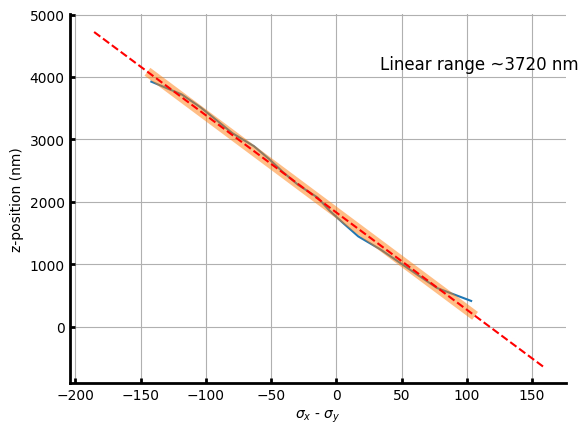

array([ 1.58407769e+02,  1.23782665e+02,  1.03327083e+02,  7.72455631e+01,
        6.25755810e+01,  4.81408426e+01,  3.36786341e+01,  1.68114396e+01,
        5.61684319e+00, -5.26224522e+00, -1.42056793e+01, -2.93618867e+01,
       -4.10712598e+01, -5.15695464e+01, -6.32517934e+01, -7.96679069e+01,
       -9.16858469e+01, -1.04011285e+02, -1.18419482e+02, -1.41856374e+02,
       -1.61988755e+02, -1.87283383e+02, -2.22758501e+02, -3.28035416e+02,
       -5.29244640e+02, -2.60034516e+03, -5.88470297e+04, -6.47448125e+04,
       -9.41528454e+04, -1.04924662e+05, -3.86196303e+04])

In [23]:
std0 = np.array(std_proj_0)
std1 = np.array(std_proj_1)
x = np.linspace(0, std0.shape[0], std0.shape[0]) * 200
sp = 2
ep = 20
# sub = std0[sp:ep] - std1[sp:ep]
sub = std0 - std1

x_new = np.linspace(sub[ep-1], sub[sp+1], 100)
p3 = np.polyfit(sub[sp:ep], x[sp:ep], 1)

lin_range = x[ep]-x[sp] 
print(x[ep]-x[sp])

print(p3)



fig, ax = plt.subplots()
ax.plot(sub[sp:ep], x[sp:ep])

ax.plot(sub[sp:ep], np.polyval(p3, sub[sp:ep]), '-', linewidth=7, alpha=0.5)
ax.plot(sub[sp-2:ep+2], np.polyval(p3, sub[sp-2:ep+2]), 'r--')
ax.text(sub[sp+4], x[ep], f"Linear range ~{lin_range:.0f} nm", fontsize=12)
ax.grid()

# set linewidth of axes
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)

# set ticks inwards
ax.xaxis.set_tick_params(width=2, direction='in')
ax.yaxis.set_tick_params(width=2, direction='in')

# hide top and right axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)



ax.set_xlabel("$\sigma_{x}$ - $\sigma_{y}$")
ax.set_ylabel("z-position (nm)")
plt.show()
sub

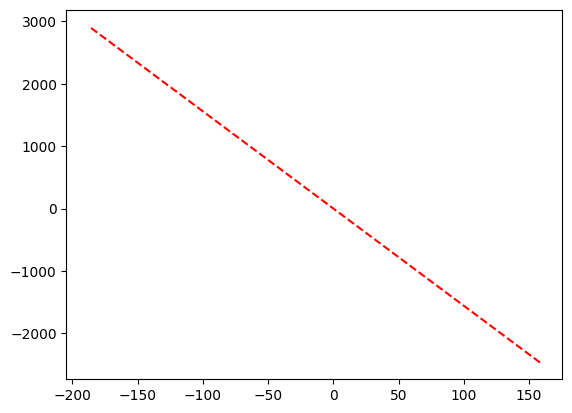

In [24]:
plt.figure()
plt.plot(sub[sp-2:ep+2], np.polyval([p3[0], 0], sub[sp-2:ep+2]), 'r--')


2893.3333333333335


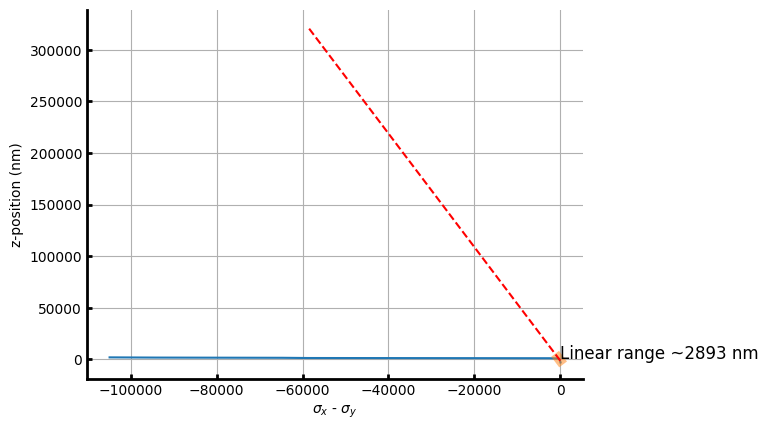

In [11]:
%matplotlib inline
std0 = np.array(std_proj_0)
std1 = np.array(std_proj_1)

x = np.linspace(0, std0.shape[0], std0.shape[0]) * 200 - 4000
sub = std0 - std1

sp = 11
ep = 25


x_new = np.linspace(sub[ep-1], sub[sp+1], 100)
p3 = np.polyfit(sub[sp:ep], x[sp:ep], 1)

lin_range = x[ep]-x[sp] 
print(x[ep]-x[sp])



fig, ax = plt.subplots()
ax.plot(sub[5:30], x[5:30])
ax.plot(sub[sp:ep], np.polyval(p3, sub[sp:ep]), '-', linewidth=7, alpha=0.5)
ax.plot(sub[sp-2:ep+2], np.polyval(p3, sub[sp-2:ep+2]), 'r--')
ax.text(sub[sp+4], x[ep], f"Linear range ~{lin_range:.0f} nm", fontsize=12)
ax.grid()

# set linewidth of axes
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)

# set ticks inwards
ax.xaxis.set_tick_params(width=2, direction='in')
ax.yaxis.set_tick_params(width=2, direction='in')

# hide top and right axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)



ax.set_xlabel("$\sigma_{x}$ - $\sigma_{y}$")
ax.set_ylabel("z-position (nm)")
plt.show()

In [ ]:
# from here below old stuff - not really useful.

In [ ]:
id_slider = widgets.IntSlider()
id_slider.value = 0
id_slider.max = 31
output = widgets.Output()


display(id_slider, output)
def on_value_change(change):
    with output:
        frame = stack[id_slider.value]
        plt.subplot(2, 1, 1)
        plt.imshow(frame)
        plt.yticks([])
        plt.xticks([])
        # and plot projections
        plt.subplot(2, 2, 3)
        plt.plot(np.sum(frame, axis=0))
        # hide y axis labels
        plt.yticks([])
        plt.title("Axis 0")
        
        plt.subplot(2, 2, 4)
        plt.plot(np.sum(frame, axis=1))
        plt.yticks([])
        plt.title("Axis 1")
        
        plt.show()
                
        

id_slider.observe(on_value_change, names='value')

In [ ]:

frame = stack[id_slider.value]
plt.subplot(2, 1, 1)
plt.imshow(frame)
plt.yticks([])
plt.xticks([])
# and plot projections
plt.subplot(2, 2, 3)
plt.plot(np.sum(frame, axis=0))
# hide y axis labels
plt.yticks([])
plt.title("Axis 0")

plt.subplot(2, 2, 4)
plt.plot(np.sum(frame, axis=1))
plt.yticks([])
plt.title("Axis 1")

plt.show()